In [23]:
import requests
import pandas as pd

def fetch_etf_data(url: str) -> dict:
    """Récupère les données des ETF depuis l'API."""
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

def process_etf_data(data: dict) -> pd.DataFrame:
    """Traite les données JSON des ETF et retourne un DataFrame."""
    etfs = data[0]['etfs']

    # Transformation des données en DataFrame
    df = pd.DataFrame(etfs)

    # Extraction des performances dans des colonnes séparées
    performance_df = pd.json_normalize(df['performance'])
    df = pd.concat([df.drop(columns=['performance']), performance_df], axis=1)

    # Conversion des colonnes numériques
    df['expense_ratio'] = pd.to_numeric(df['expense_ratio'], errors='coerce')
    df['total_assets'] = pd.to_numeric(df['total_assets'], errors='coerce')
    df['dividend_yield'] = pd.to_numeric(df['dividend_yield'], errors='coerce')

    # Conversion des dates
    df['date_of_inception'] = pd.to_datetime(df['date_of_inception'], errors='coerce')

    return df

def main():
    url = "https://re6th24hj3.execute-api.eu-north-1.amazonaws.com/default/ETF"
    data = fetch_etf_data(url)
    etf_df = process_etf_data(data)

    # Affichage des 5 premiers ETF pour vérification
    print(etf_df.head())

    # Sauvegarde des données dans un fichier CSV
    etf_df.to_csv("etf_data.csv", index=False, sep=';', encoding='utf-8')  # Séparateur semicolon et encodage UTF-8

if __name__ == "__main__":
    main()


   id                              title symbol   
0   1                   SPDR S&P 500 ETF    SPY  \
1   2    Vanguard Total Stock Market ETF    VTI   
2   3  iShares MSCI Emerging Markets ETF    EEM   
3   4                  Invesco QQQ Trust    QQQ   
4   5  Vanguard FTSE All-World ex-US ETF    VEU   

                                         description  expense_ratio   
0  Fonds négocié en bourse qui suit l'indice S&P ...           0.09  \
1  ETF offrant une exposition à l'ensemble du mar...           0.03   
2  ETF qui permet d'investir dans des entreprises...           0.68   
3  Suivi de l'indice NASDAQ-100, représentant les...           0.20   
4  ETF qui permet d'investir dans des actions de ...           0.08   

   total_assets               sector  region  dividend_yield   
0   40000000000     Large Cap Equity     USA            1.45  \
1   20000000000  Total Market Equity     USA            1.77   
2   25000000000     Emerging Markets  Global            2.10   
3   160000

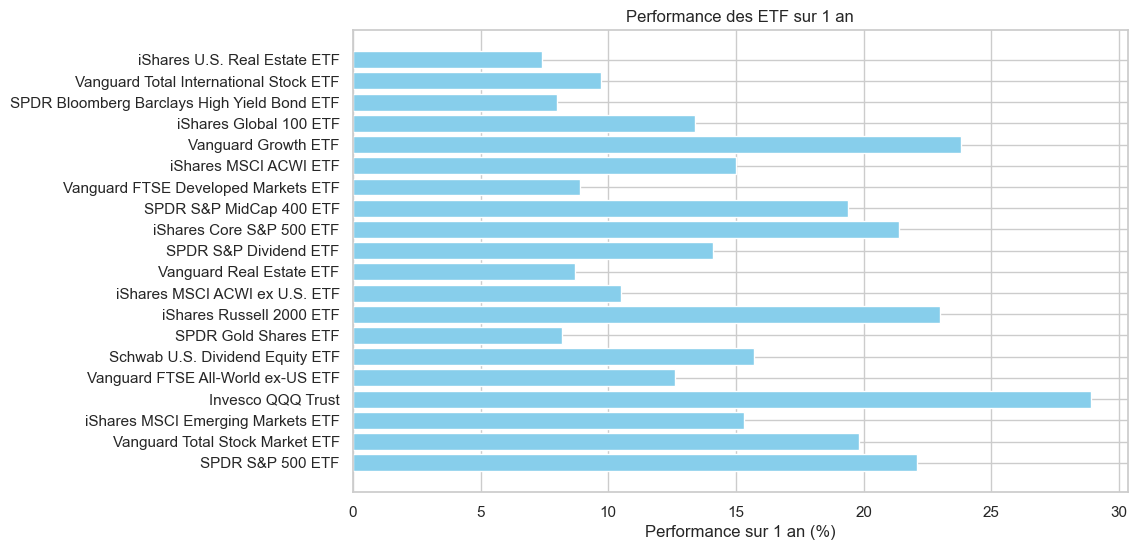

In [22]:
import requests
import matplotlib.pyplot as plt

# Récupérer les données depuis l'URL
url = "https://re6th24hj3.execute-api.eu-north-1.amazonaws.com/default/ETF"
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    data = response.json()
else:
    print("Erreur de récupération des données.")
    data = []

# Extraire les performances des ETF
etfs = data[0]["etfs"]
performance_1_year = [etf["performance"]["1_year"] for etf in etfs]
etf_titles = [etf["title"] for etf in etfs]

# Créer un graphique
plt.figure(figsize=(10, 6))
plt.barh(etf_titles, performance_1_year, color='skyblue')
plt.xlabel("Performance sur 1 an (%)")
plt.title("Performance des ETF sur 1 an")
plt.show()
